In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df = pd.read_csv('heart_disease_NEW.csv')
df.dropna(inplace=True)

In [3]:
print(f"Total number of null values in the dataset are {df.isnull().sum().sum()}")

Total number of null values in the dataset are 0


In [4]:
print(f"Our dataset has {df.shape[0]} data points and {df.shape[1]} features")


Our dataset has 303 data points and 14 features


In [5]:
print(f"Our target variable have {round(100*df.target.value_counts(normalize = True)[False],2)} % of target 0 and {round(100*df.target.value_counts(normalize = True)[True],2)} % of target 1")

Our target variable have 72.28 % of target 0 and 27.72 % of target 1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    bool   
dtypes: bool(1), float64(7), int64(4), object(2)
memory usage: 33.4+ KB


In [7]:
df = df.apply(lambda ca:pd.to_numeric(ca, errors='coerce'))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,1.0,145,233,1.0,2.0,150,0.0,2.3,3.0,0.0,6.0,False
1,67,1.0,4.0,160,286,0.0,2.0,108,1.0,1.5,2.0,3.0,3.0,True
2,67,1.0,4.0,120,229,0.0,2.0,129,1.0,2.6,2.0,2.0,7.0,False
3,37,1.0,3.0,130,250,0.0,0.0,187,0.0,3.5,3.0,0.0,3.0,False
4,41,0.0,2.0,130,204,0.0,2.0,172,0.0,1.4,1.0,0.0,3.0,False


In [8]:
df = df.dropna()

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [10]:
print(f"Oi mh-kardiopatheis einai : { len(df[df.target == False]) }")
print(f"Oi kardiopatheis einai : { len(df[df.target == True]) }")

Oi mh-kardiopatheis einai : 214
Oi kardiopatheis einai : 83


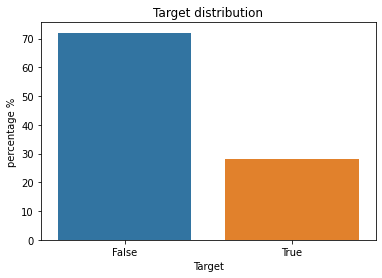

In [11]:
sns.barplot(df.target.value_counts().index,100*df.target.value_counts(normalize = True))
plt.title('Target distribution')
plt.xlabel('Target')
plt.ylabel('percentage %')
plt.show()

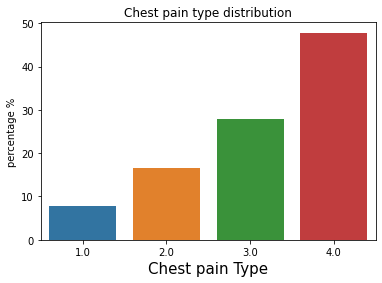

In [12]:
sns.barplot(df.cp.value_counts().index,100*df.cp.value_counts(normalize = True))
plt.title('Chest pain type distribution')
plt.xlabel('Chest pain Type',fontsize = 15)
plt.ylabel('percentage %')
plt.show()

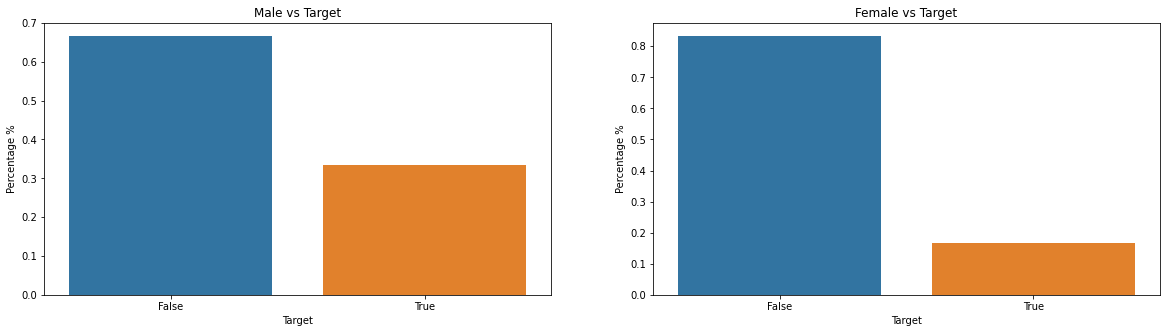

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(df[df.sex == 1].target.value_counts().index,df[df.sex == 1].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Male vs Target')
plt.subplot(1,2,2)
sns.barplot(df[df.sex == 0].target.value_counts().index,df[df.sex == 0].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Female vs Target')
plt.show()


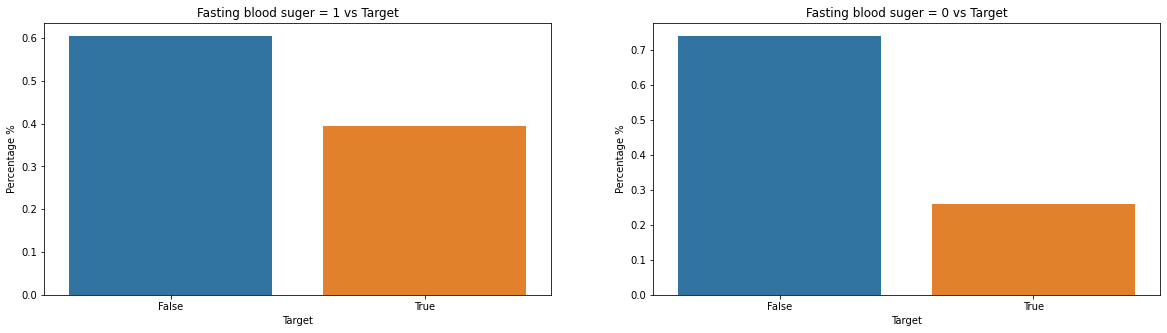

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(df[df.fbs == 1].target.value_counts().index,df[df.fbs == 1].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Fasting blood suger = 1 vs Target')
plt.subplot(1,2,2)
sns.barplot(df[df.fbs == 0].target.value_counts().index,df[df.fbs == 0].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Fasting blood suger = 0 vs Target')
plt.show()


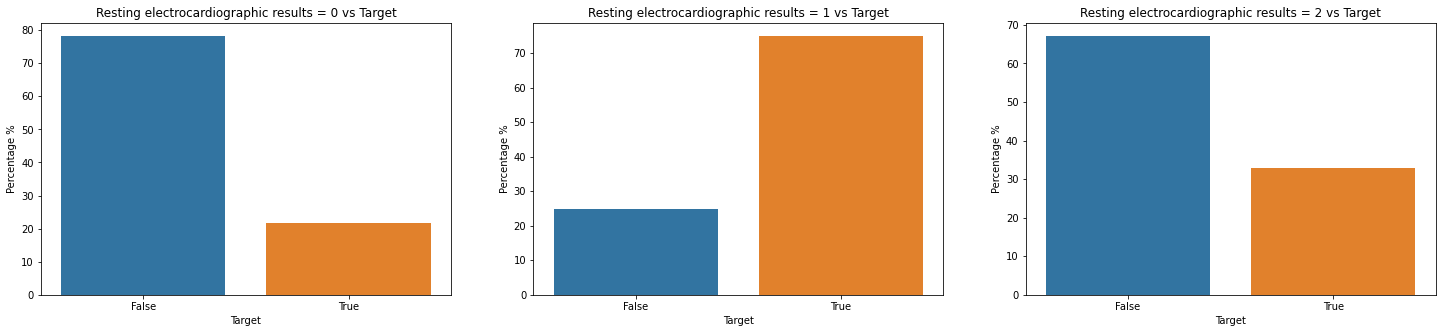

In [15]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.barplot(df[df.restecg == 0].target.value_counts().index,100*df[df.restecg == 0].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Resting electrocardiographic results = 0 vs Target')
plt.subplot(1,3,2)
sns.barplot(df[df.restecg == 1].target.value_counts().index,100*df[df.restecg == 1].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Resting electrocardiographic results = 1 vs Target')
plt.subplot(1,3,3)
sns.barplot(df[df.restecg == 2].target.value_counts().index,100*df[df.restecg == 2].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Resting electrocardiographic results = 2 vs Target')
plt.show()

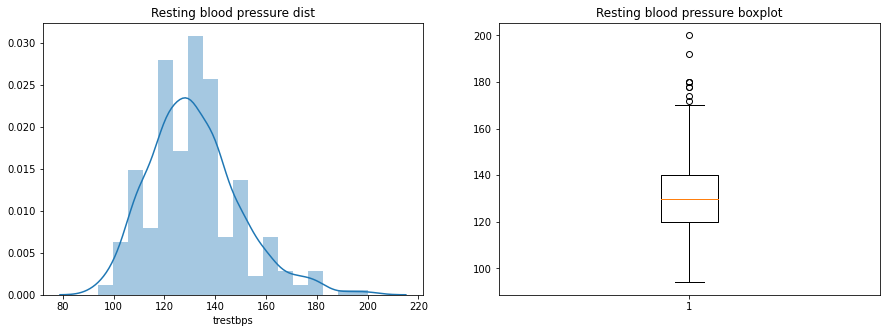

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df.trestbps)
plt.title('Resting blood pressure dist')
plt.subplot(1,2,2)
plt.boxplot(df.trestbps)
plt.title('Resting blood pressure boxplot')
plt.show()

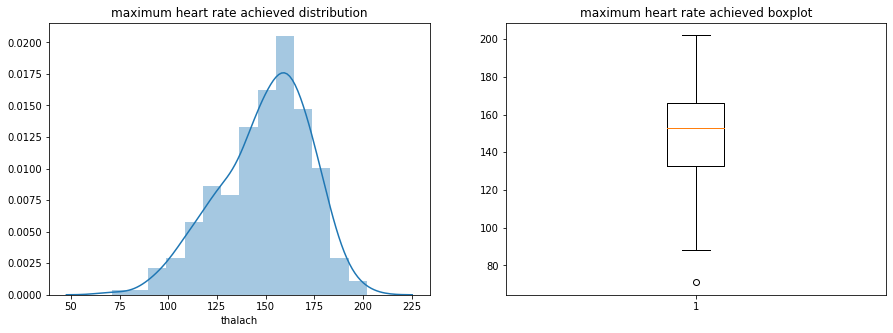

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df.thalach)
plt.title('maximum heart rate achieved distribution')
plt.subplot(1,2,2)
plt.boxplot(df.thalach)
plt.title('maximum heart rate achieved boxplot')
plt.show()

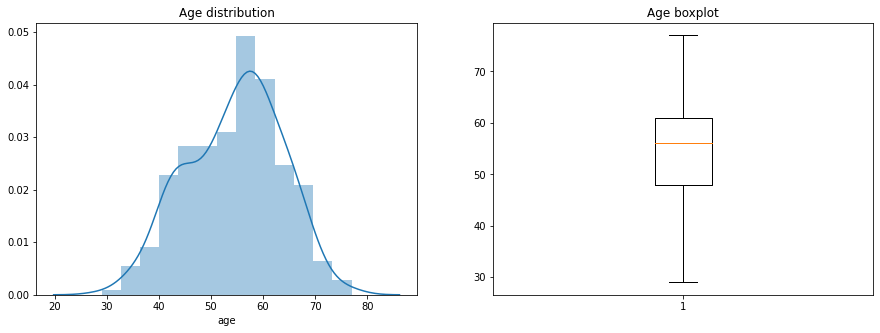

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df.age)
plt.title('Age distribution')
plt.subplot(1,2,2)
plt.boxplot(df.age)
plt.title('Age boxplot')
plt.show()

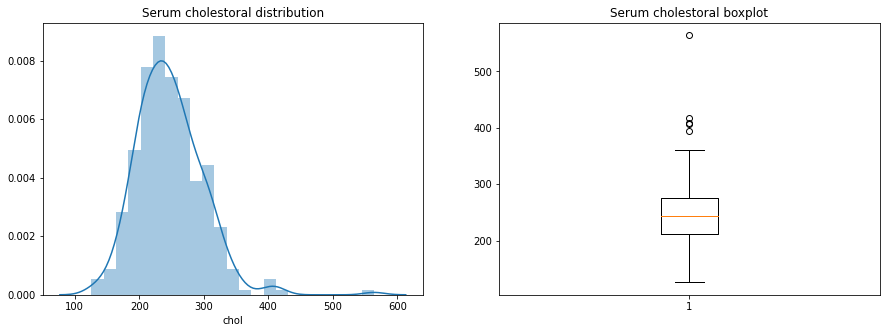

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df.chol)
plt.title('Serum cholestoral distribution')
plt.subplot(1,2,2)
plt.boxplot(df.chol)
plt.title('Serum cholestoral boxplot')
plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

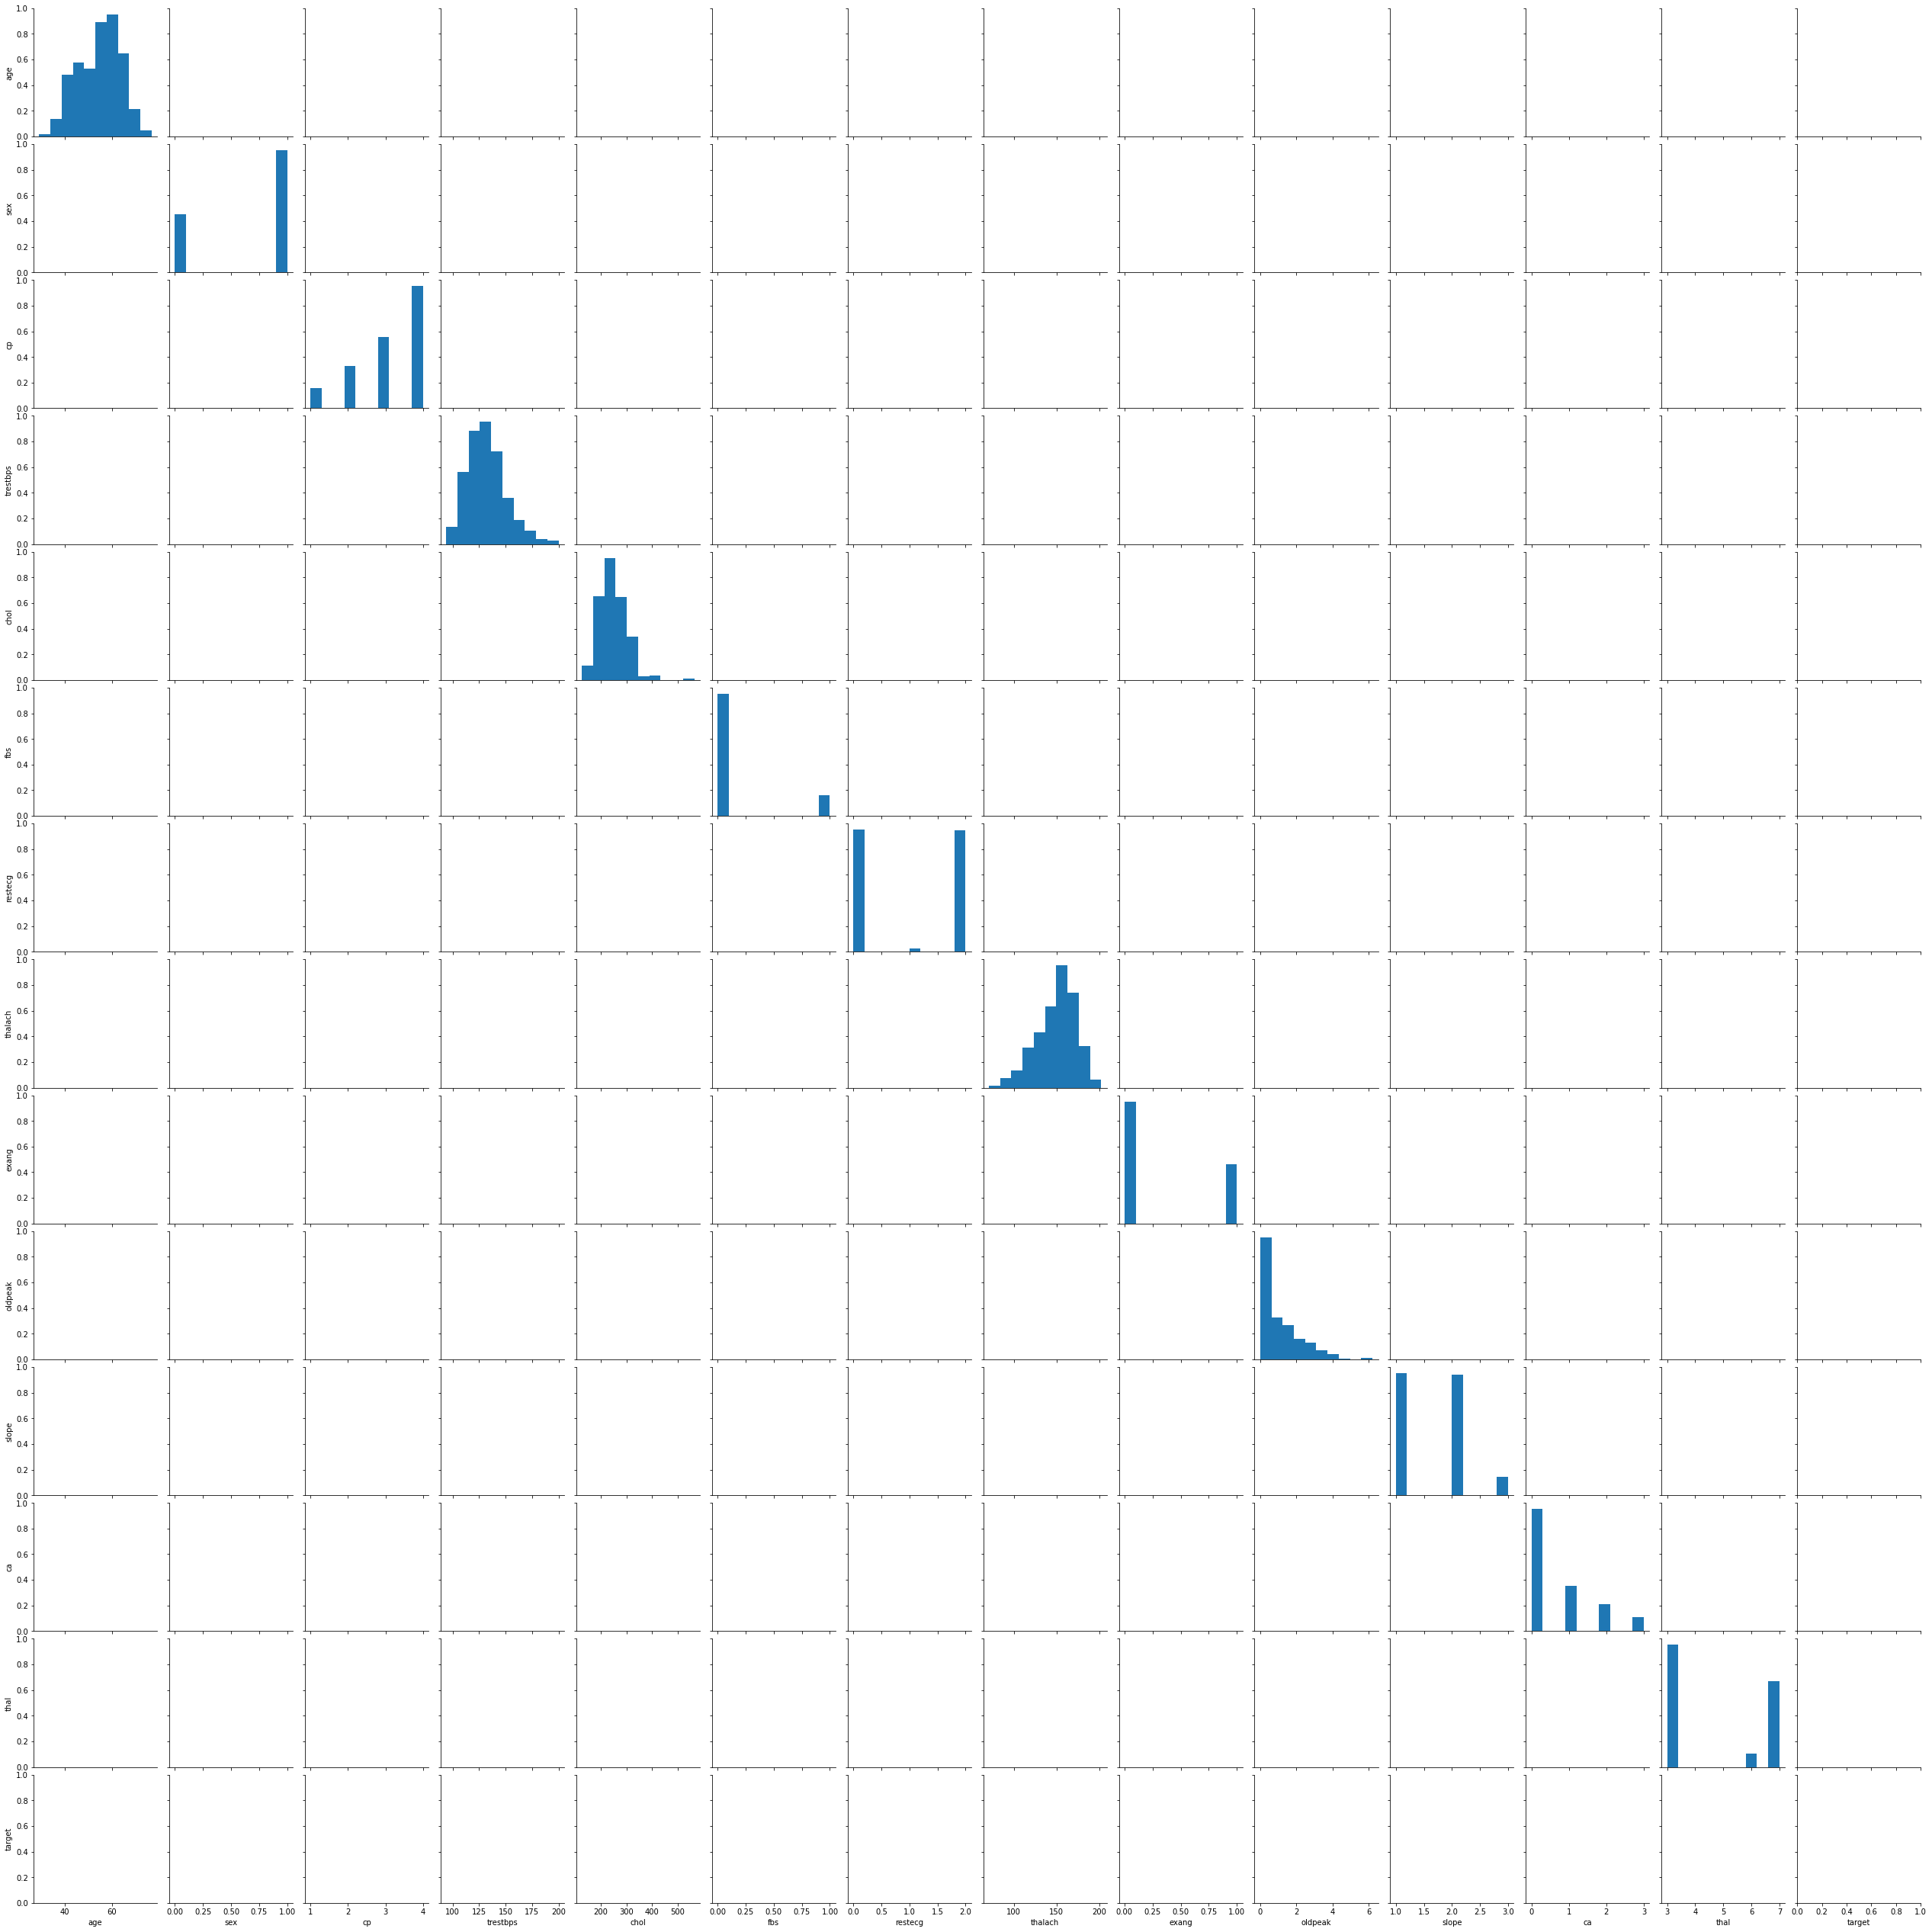

In [20]:
sns.pairplot(df)
plt.show()

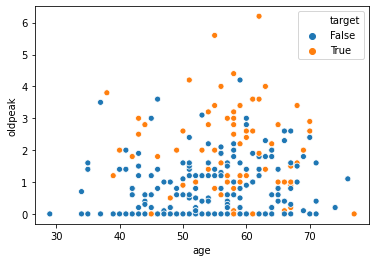

In [21]:
sns.scatterplot(df.age,df.oldpeak,hue=df.target)
plt.show()

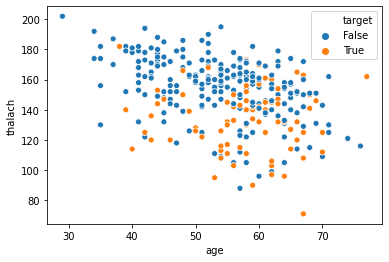

In [22]:
sns.scatterplot(df.age,df.thalach,hue=df.target)
plt.show()

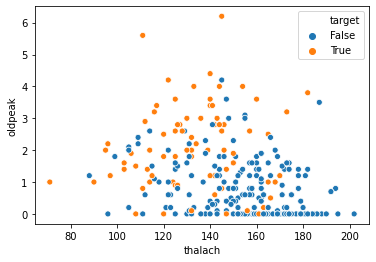

In [23]:
sns.scatterplot(df.thalach,df.oldpeak,hue=df.target)
plt.show()

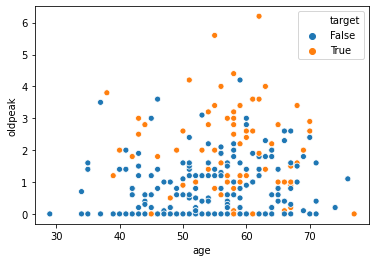

In [24]:
sns.scatterplot(df.age,df.oldpeak,hue=df.target)
plt.show()

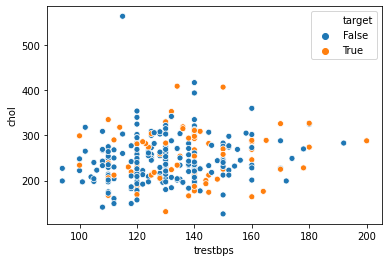

In [25]:
sns.scatterplot(df.trestbps,df.chol,hue=df.target)
plt.show()

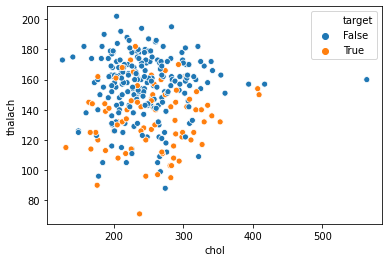

In [26]:
sns.scatterplot(df.chol,df.thalach,hue=df.target)
plt.show()

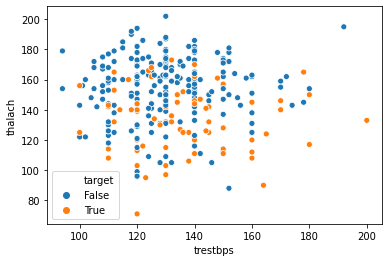

In [27]:
sns.scatterplot(df.trestbps,df.thalach,hue=df.target)
plt.show()

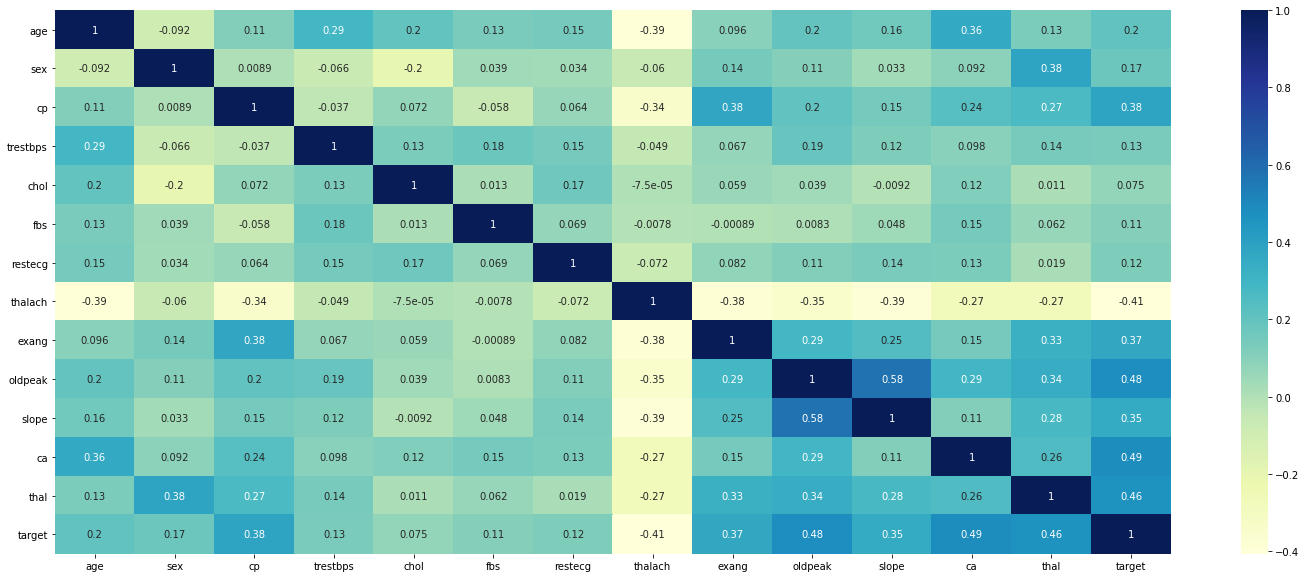

In [28]:
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(),annot=True,cmap = 'YlGnBu')
plt.show()

In [29]:
c = df.corr().abs()

s = c.unstack()

so = s.sort_values(kind="quicksort")

#print(so)
print(so[150:183])

thal     oldpeak    0.344976
oldpeak  thal       0.344976
         thalach    0.347640
thalach  oldpeak    0.347640
target   slope      0.352299
slope    target     0.352299
age      ca         0.362210
ca       age        0.362210
exang    target     0.366267
target   exang      0.366267
cp       exang      0.377525
exang    cp         0.377525
cp       target     0.380648
target   cp         0.380648
sex      thal       0.383652
thal     sex        0.383652
thalach  exang      0.384368
exang    thalach    0.384368
thalach  slope      0.389307
slope    thalach    0.389307
age      thalach    0.394563
thalach  age        0.394563
         target     0.406814
target   thalach    0.406814
         thal       0.462742
thal     target     0.462742
target   oldpeak    0.482680
oldpeak  target     0.482680
target   ca         0.486903
ca       target     0.486903
slope    oldpeak    0.579037
oldpeak  slope      0.579037
age      age        1.000000
dtype: float64


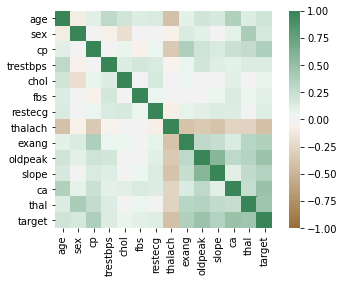

In [30]:
correlation_full_health = df.corr()

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [31]:
X = df.drop('target',1)
y = df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 2)

In [32]:
#scaling the data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train = pd.DataFrame(X_train,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])
X_test = pd.DataFrame(X_test,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [34]:
X_test.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.523810,0.0,1.0,0.377358,0.972509,0.0,1.0,0.637097,1.0,0.306452,0.5,0.666667,1.0
1,0.714286,1.0,0.0,0.716981,0.347079,0.0,1.0,0.677419,0.0,0.096774,0.5,0.000000,1.0
2,0.476190,1.0,1.0,0.150943,0.274914,0.0,1.0,0.298387,1.0,0.000000,0.5,0.333333,0.0
3,0.547619,0.0,1.0,0.245283,0.783505,0.0,0.0,0.741935,1.0,0.096774,0.0,0.000000,0.0
4,0.547619,1.0,1.0,0.547170,0.508591,0.0,0.0,0.137097,1.0,0.193548,0.5,0.333333,1.0


In [35]:
print(X_train.shape)
print(X_test.shape)

(207, 13)
(90, 13)


In [36]:
df.isnull().sum().sum()

0

In [37]:
#DECISSION TREE

from sklearn.tree import DecisionTreeClassifier
accuracies = {}

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 73.33%


In [38]:
# KNN Model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 NN Score: 83.33%


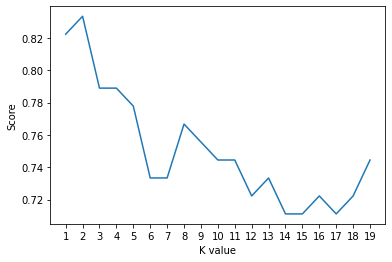

Maximum KNN Score is 83.33%


In [39]:
# try ro find best k value

scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100

accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [40]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 85.56%


In [41]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 82.22%


In [42]:
# SVM Classification

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
confusion_matrix(y_pred,y_test)
classifier_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, classifier_predictions)*100
accuracies['SVM'] = acc
print("SVM Accuracy Score : {:.2f}%".format(acc))

SVM Accuracy Score : 80.00%


In [43]:
# Neural Network

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
acc = mlp.score(X_test,y_test)*100
accuracies['Neural Network'] = acc
print("Neural Network Accuracy Score : {:.2f}%".format(acc))

Neural Network Accuracy Score : 81.11%


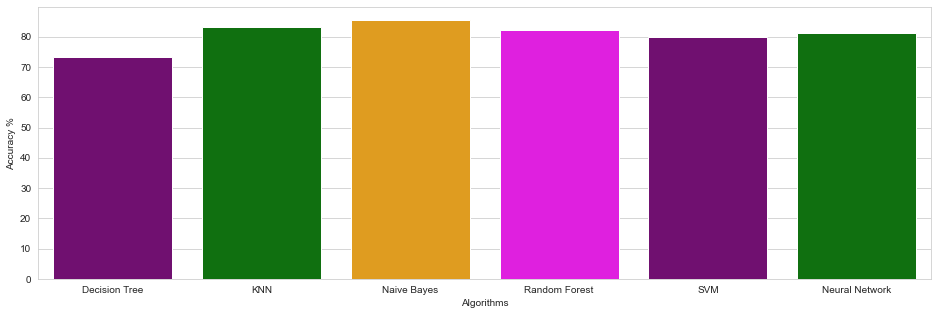

In [44]:
# PLOTSSS

colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


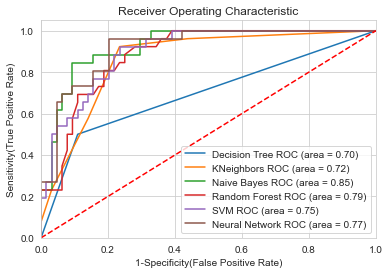

In [45]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'KNeighbors',
    'model': KNeighborsClassifier(),   
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
},
{
    'label': 'SVM',
    'model': svm.SVC(probability=True),
},
{
    'label': 'Neural Network',
    'model': MLPClassifier(),
}    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display